# Homework 1 Exercise 2
Now suppose the data are 4 water and 2 land. Compute the posterior
again, but this time use a prior that is zero below p = 0.5 and a constant
above p = 0.5. This corresponds to prior information that a majority of the
Earth’s surface is water.

In [1]:
using StatsPlots
using StatisticalRethinking: hpdi, PI
using Gen, Distributions

In [2]:
grid_length = 1_000

1000

In [3]:
# define grid
p_grid = Vector(range(0,1,length=grid_length))

1000-element Vector{Float64}:
 0.0
 0.001001001001001001
 0.002002002002002002
 0.003003003003003003
 0.004004004004004004
 0.005005005005005005
 0.006006006006006006
 0.007007007007007007
 0.008008008008008008
 0.009009009009009009
 0.01001001001001001
 0.011011011011011011
 0.012012012012012012
 ⋮
 0.988988988988989
 0.98998998998999
 0.990990990990991
 0.991991991991992
 0.992992992992993
 0.993993993993994
 0.994994994994995
 0.995995995995996
 0.996996996996997
 0.997997997997998
 0.998998998998999
 1.0

Define the prior. Go through the grid and select 0 or 1 depending if less than or more than 0.5

In [4]:
prior = [g < 0.5 ? 0. : 1. for g in p_grid]

1000-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [5]:
binomials =  Binomial.(6, p_grid)

1000-element Vector{Binomial{Float64}}:
 Binomial{Float64}(n=6, p=0.0)
 Binomial{Float64}(n=6, p=0.001001001001001001)
 Binomial{Float64}(n=6, p=0.002002002002002002)
 Binomial{Float64}(n=6, p=0.003003003003003003)
 Binomial{Float64}(n=6, p=0.004004004004004004)
 Binomial{Float64}(n=6, p=0.005005005005005005)
 Binomial{Float64}(n=6, p=0.006006006006006006)
 Binomial{Float64}(n=6, p=0.007007007007007007)
 Binomial{Float64}(n=6, p=0.008008008008008008)
 Binomial{Float64}(n=6, p=0.009009009009009009)
 Binomial{Float64}(n=6, p=0.01001001001001001)
 Binomial{Float64}(n=6, p=0.011011011011011011)
 Binomial{Float64}(n=6, p=0.012012012012012012)
 ⋮
 Binomial{Float64}(n=6, p=0.988988988988989)
 Binomial{Float64}(n=6, p=0.98998998998999)
 Binomial{Float64}(n=6, p=0.990990990990991)
 Binomial{Float64}(n=6, p=0.991991991991992)
 Binomial{Float64}(n=6, p=0.992992992992993)
 Binomial{Float64}(n=6, p=0.993993993993994)
 Binomial{Float64}(n=6, p=0.994994994994995)
 Binomial{Float64}(n=6, p=0.995995995

In [6]:
likelihood = pdf.(binomials, 4)

1000-element Vector{Float64}:
 0.0
 1.5030014939789556e-11
 2.3999855615496e-10
 1.212556615577182e-9
 3.824586224990944e-9
 9.318609564475847e-9
 1.9284208935876254e-8
 3.5654457601298306e-8
 6.070236148663465e-8
 9.703731175011594e-8
 1.4760154821588962e-7
 2.1566663367262914e-7
 3.048299390371658e-7
 ⋮
 0.0017398486814854074
 0.0014437217394247422
 0.0011741514721764037
 0.0009314786854868136
 0.0007160462890808886
 0.0005281993038058788
 0.0003682848687858578
 0.0002366522485872937
 0.00013365284039538276
 5.964018120125613e-5
 1.4969955000089473e-5
 0.0

In [7]:
unstd_posterior = likelihood .* prior

1000-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0017398486814854074
 0.0014437217394247422
 0.0011741514721764037
 0.0009314786854868136
 0.0007160462890808886
 0.0005281993038058788
 0.0003682848687858578
 0.0002366522485872937
 0.00013365284039538276
 5.964018120125613e-5
 1.4969955000089473e-5
 0.0

In [8]:
posterior = unstd_posterior ./ sum(unstd_posterior)

1000-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 1.5762265966832433e-5
 1.3079485751302449e-5
 1.0637297361970357e-5
 8.438788349423339e-6
 6.487065325370948e-6
 4.785254027365148e-6
 3.3364993836168637e-6
 2.1439655779129055e-6
 1.210836114630408e-6
 5.403138838497683e-7
 1.356212265663647e-7
 0.0

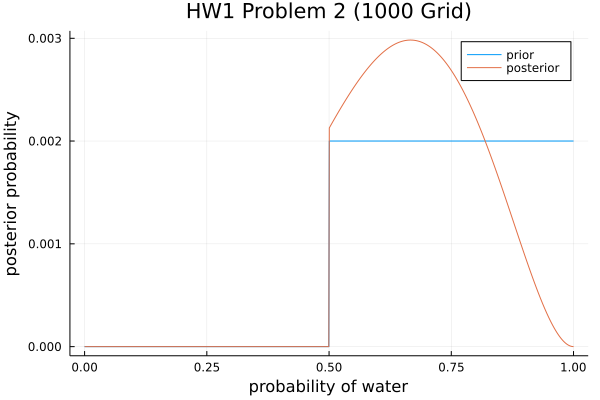

In [9]:
plot(p_grid, [(prior ./ sum(prior)) posterior], title="HW1 Problem 2 ($grid_length Grid)", xlabel="probability of water", ylabel="posterior probability", labels=["prior" "posterior"])

# Homework 1 Exercise 3
For the posterior distribution from 2, compute 89% percentile and HPDI
intervals. Compare the widths of these intervals. Which is wider? Why? If
you had only the information in the interval, what might you misunderstand
about the shape of the posterior distribution

In [10]:
using StatisticalRethinking, Base.Iterators

In [11]:
pi_posterior = PI(posterior;perc_prob=0.89)

2-element Vector{Float64}:
 0.0
 0.002951936076870961

In [12]:
hpdi_posterior = hpdi(posterior; alpha=0.11)

2-element Vector{Float64}:
 0.0
 0.002864336553959406

In [13]:
pi_posterior_grid = copy(posterior)
for (i,p) in enumerate(posterior)
    if p >= pi_posterior[1]
        break
    end
    pi_posterior_grid[i] = 0.
end
for (i,p) in Iterators.reverse(enumerate(posterior))
    if p >= pi_posterior[2]
        break
    end
    pi_posterior_grid[i] = 0.    
end
pi_posterior_grid

1000-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [14]:
hpdi_posterior_grid = copy(posterior)
for (i,p) in enumerate(posterior)
    if p >= hpdi_posterior[1]
        break
    end
    hpdi_posterior_grid[i] = 0.
end
for (i,p) in Iterators.reverse(enumerate(posterior))
    if p >= hpdi_posterior[2]
        break
    end
    hpdi_posterior_grid[i] = 0.    
end
hpdi_posterior_grid

1000-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

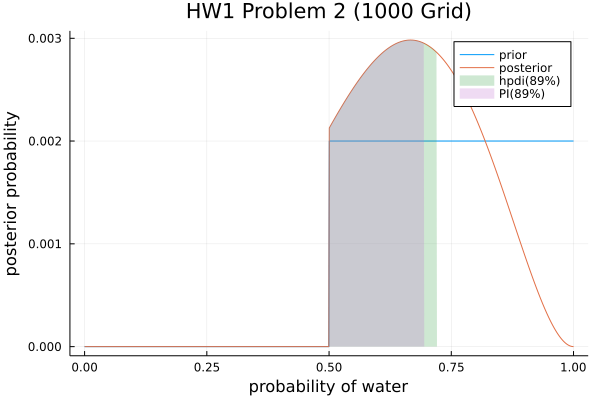

In [15]:
plot(p_grid, [(prior ./ sum(prior)) posterior], title="HW1 Problem 2 ($grid_length Grid)", xlabel="probability of water", ylabel="posterior probability", labels=["prior" "posterior"])
plot!(p_grid, hpdi_posterior_grid, linealpha=0, fillalpha=1/4, fillrange=0., labels="hpdi(89%)")
plot!(p_grid, pi_posterior_grid, linealpha=0, fillalpha=1/4, fillrange=0., labels="PI(89%)")